# Group Project 01 - Group 01
Daniel Knopp, Kenzie Hensel, Ryan Hensel

In [21]:
# Import modules
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import Image

# Month names
month_names = ['January',
                'February',
                'March',
                'April',
                'May',
                'June',
                'July',
                'August',
                'September',
                'October',
                'November',
                'December',]

# Create a dictionary for the nubmer of days in each month of the year
days_in_month = { 1: 31,
                  2: 28,
                  3: 31,
                  4: 30,
                  5: 31,
                  6: 30,
                  7: 31,
                  8: 31,
                  9: 30,
                 10: 31,
                 11: 30,
                 12: 31,}

# Create a funciton to convert day in year to month, day
def day_in_year_to_month_day(day_in_year):
    month = 1
    while day_in_year > days_in_month[month]:
        day_in_year -= days_in_month[month]
        month += 1
    return month, day_in_year

# Create a class for music club members
class Member:
    def __init__(self):
        self.birth_day_in_year = random.randint(1, 365)
        (self.birthday_month, self.birthday_day) = day_in_year_to_month_day(self.birth_day_in_year)

# Part A, Case 1: Probability of Shared Birthdays in Music Club

In [9]:

# Number of iterationsz
N = 1000000

# Group size
group_size = 12

# Define the number of shared birthdays evaluation criteria
shared_birth_eval = 2

# Creata a list to store results
results = []
prob    = []

# Store a variable for how many time 2 or more people share a birthday
shared_birth_2_or_more = 0

# Loop over all iterations
for i in range(N):

    # Create a list of 12 members
    members = [Member() for i in range(group_size)]

    # Store all unique birthdays as strings
    birthdays = [str(member.birthday_month) + '/' + str(member.birthday_day) for member in members]

    # Get unique birthdays
    unique_birthdays_count = {key:0 for key in set(birthdays)}

    # Loop over all members
    for person in range(len(members)):
        birthday = birthdays[person]
        if birthday in unique_birthdays_count.keys():
            unique_birthdays_count[birthday] += 1
    
    # Evaulate criteria for shared birthdays
    if shared_birth_eval in unique_birthdays_count.values():
        shared_birth_2_or_more += 1

    results.append(unique_birthdays_count)
    prob.append(shared_birth_2_or_more / (i+1))

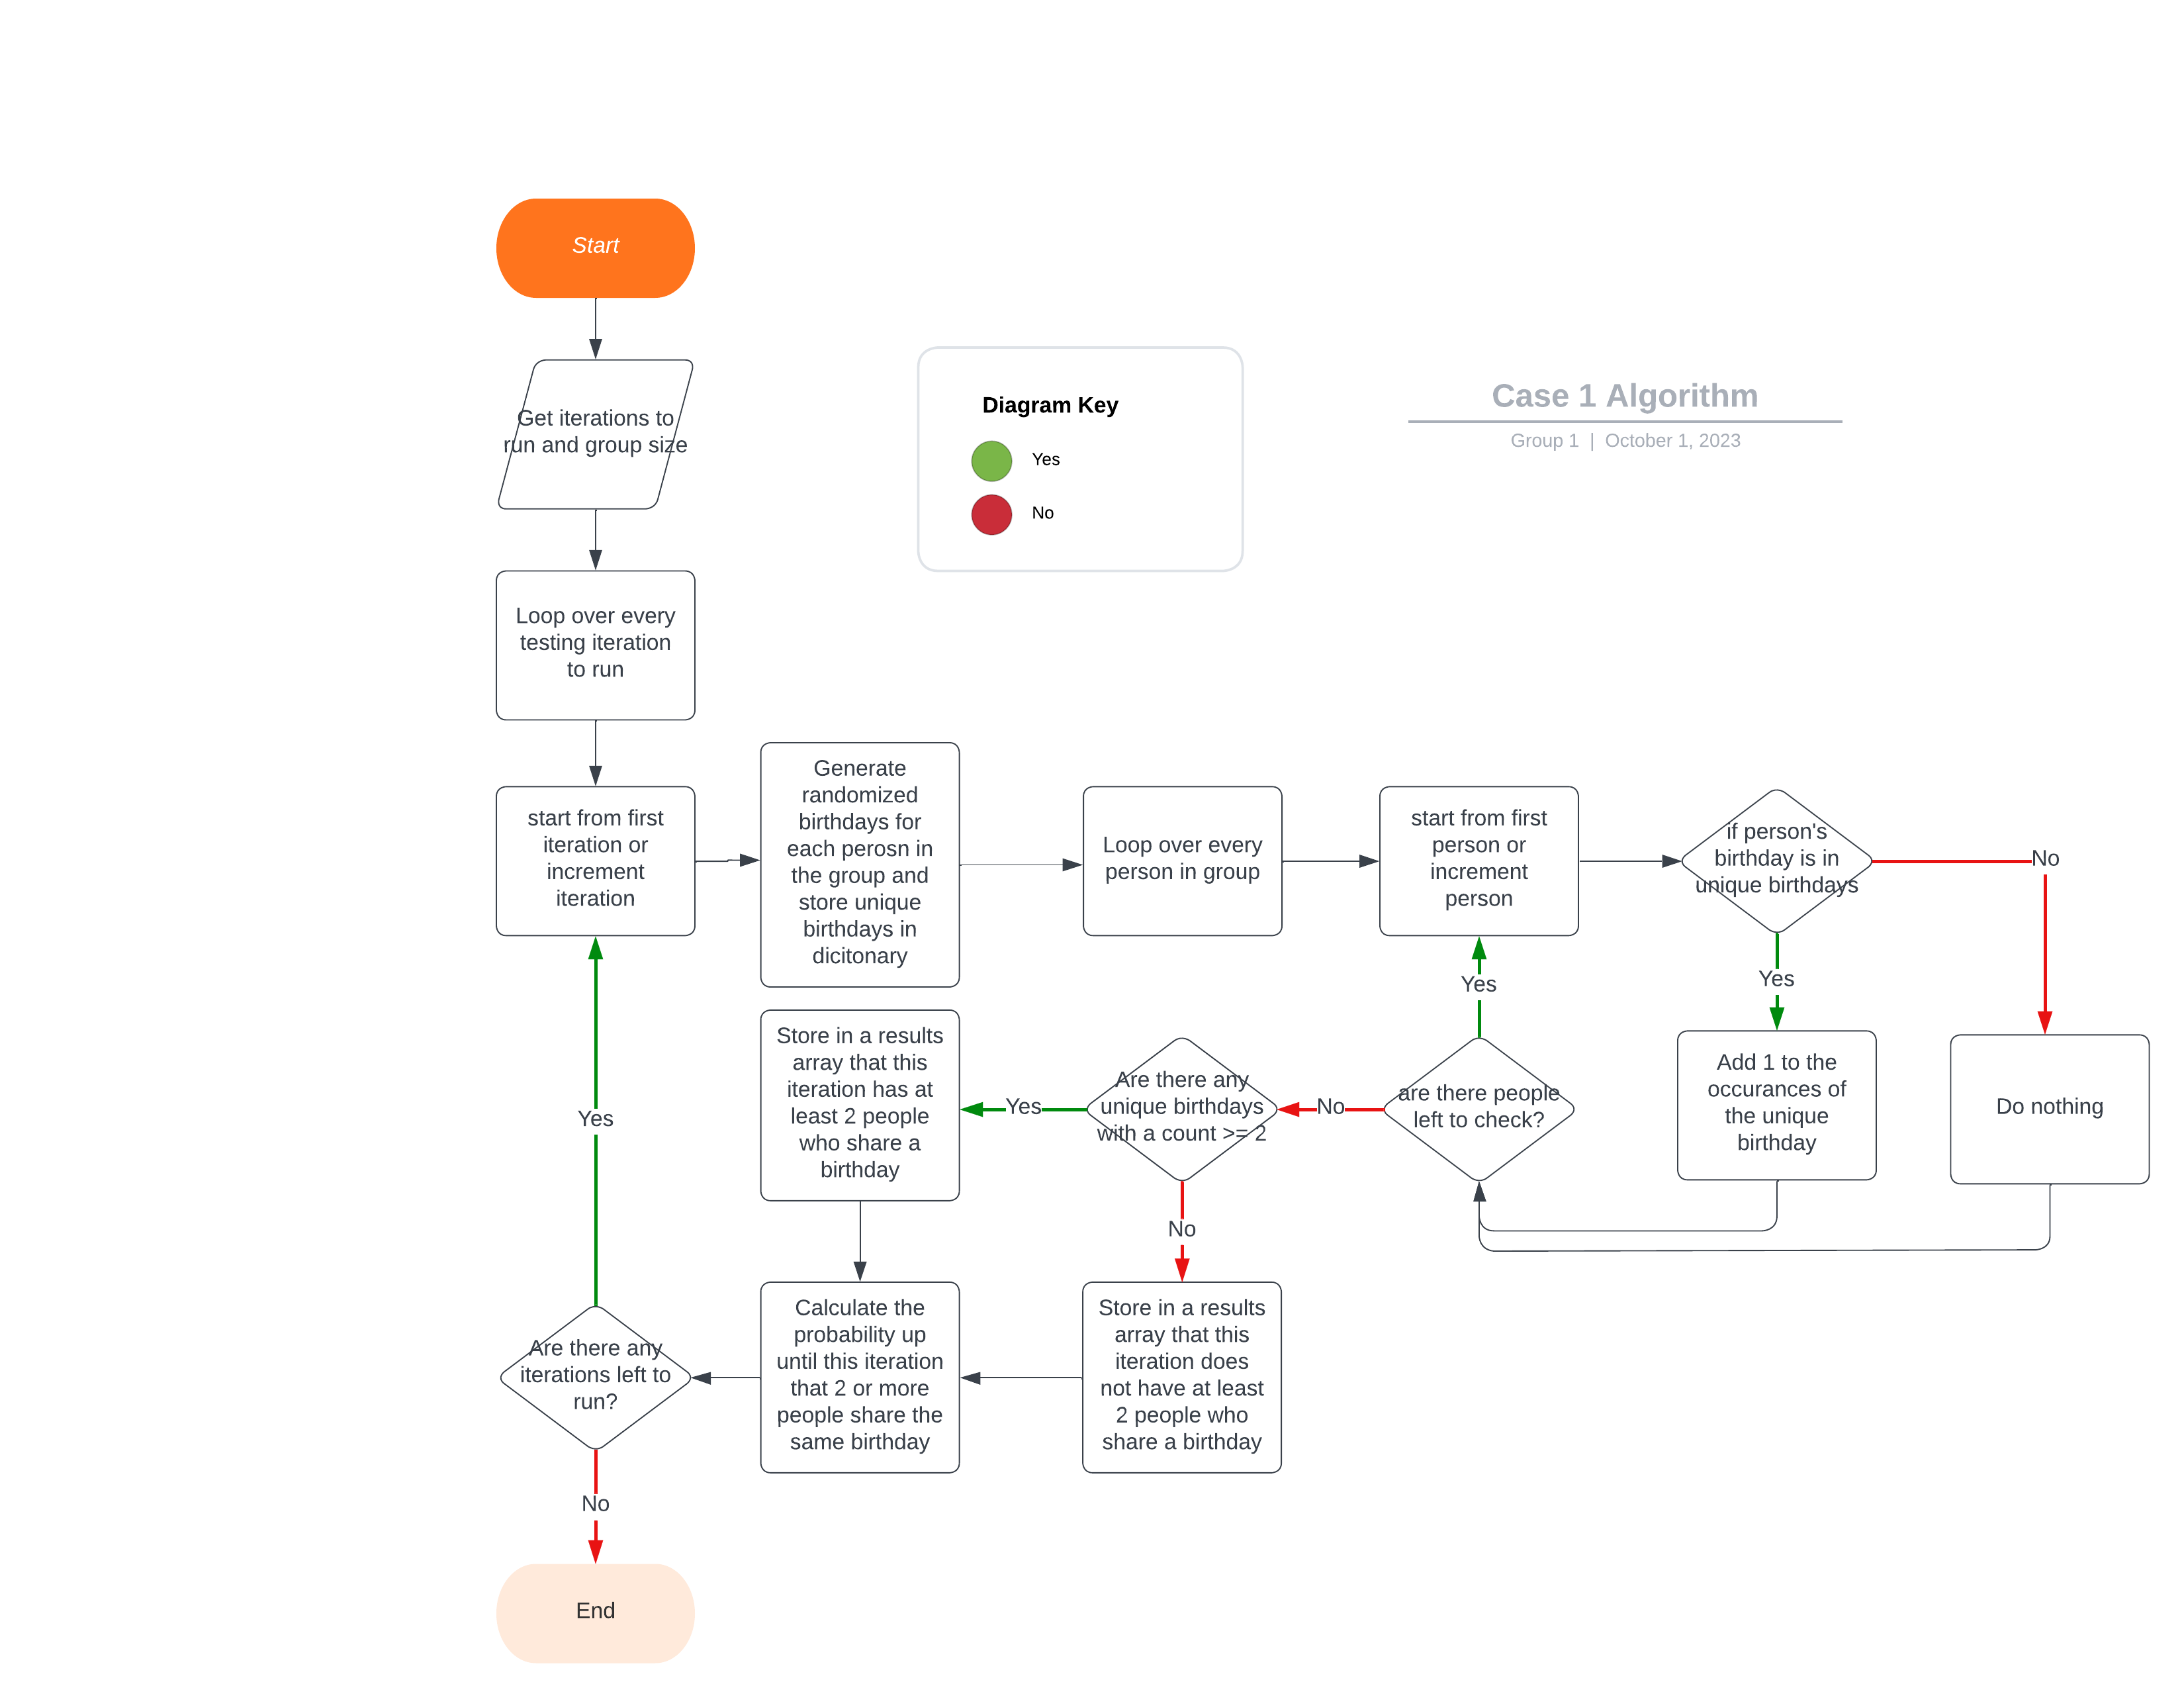

In [10]:
# Display flowchart for algorithm
Image(filename='GP_1_01_knopp_hensel_flowchart_case_1.png') 

Probability of 2 or more people sharing a birthday: 0.16580927518557736


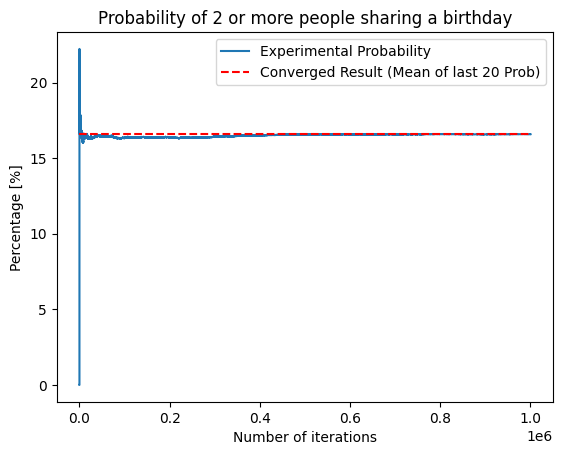

In [11]:

ave_last_20 = np.mean(prob[-20:])
print(f'Probability of 2 or more people sharing a birthday: {ave_last_20}')

# Plot a bar chart of probabilities
plt.plot(range(len(prob)), [p * 100 for p in prob], label='Experimental Probability')
plt.plot([0, len(prob)], [ave_last_20 * 100, ave_last_20 * 100], 'r--', label='Converged Result (Mean of last 20 Prob)')
# plt.ylim(15, 20)
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Percentage [%]')
plt.title('Probability of 2 or more people sharing a birthday')
plt.show()



# Summary of Case 1:

For this algorithm, we decided that the easiest way to evaluate shared birthdays was to create a dictionary which stores all unique birthdays in the group and the number of occurances of each unique birthday. Then, all we needed to do for each iteration is loop over each member and tick the occurance of their unique birthday. If any occurance of a unique birthday was greater than the evaluation criteria (2 shared birthdays, for example), the we can tick a running counter for how many iterations this occured. Finally, to evaluate how the probability converges over the iterations, we can compute a running probability of occurance by dividing the current number of times the critera for the group was met divided by the total number of iterations performed thus far. 

We plotted this data over iterations in the graph above. As you can see, the probability converges quickly over time for 2 or more shared birthdays and the probability of 2 or more people sharing the same birthday in a group of 12 is roughly 16.5%. In the example above, we computed this number over 1,000,000 iterations but as you can see in the graph, this was more iterations than required since the probability does not change significantly in the hihger iterations.

The complexity of this code is O(N^2) bacause we first loop over all elements to store the unique birthdays, then loop again to count the number of occurances for each person.

To change this code to instead find the probability of 3 or more shared birthdays in the group, all that is needed is to change the value of 'shared_birth_eval' above from 2 to 3 (or any other number you want to evaluate). Changing this value does not impact the complexity. Higher values will impact the number of iterations required for the solution to converge becaue more improbable scenarios (such as 12 people sharing the smae birthday) will occur significantly less often and thus more iterations are needed in order to capture any of these occurances in the testing dataset.

# Part B, Case 2: Probability of One Birthday Each Month and All Birthdays in Same Month

In [35]:
# Number of iterationsz
N = 10000000

# Group size
group_size = 12

# Define the number of shared birthdays evaluation criteria
shared_birth_eval = 2

# Creataresults storage
prob_one_birth_each_m = []
prob_all_birth_in_m = { 1: [],
                        2: [],
                        3: [],
                        4: [],
                        5: [],
                        6: [],
                        7: [],
                        8: [],
                        9: [],
                       10: [],
                       11: [],
                       12: [],}

# Store a variable for achieving the criteria
one_birth_every_month = 0
all_birth_in_m = { 1: 0,
                   2: 0,
                   3: 0,
                   4: 0,
                   5: 0,
                   6: 0,
                   7: 0,
                   8: 0,
                   9: 0,
                  10: 0,
                  11: 0,
                  12: 0,}

# Loop over all iterations
for i in range(N):

    # Create a list of 12 members
    members = [Member() for i in range(group_size)]

    # Store all unique birthdays as strings
    birthday_months = [member.birthday_month for member in members]

    # Get unique birthdays
    unique_birthdays_count = {key:0 for key in set(birthday_months)}

    # Loop over all members
    for person in range(len(members)):
        birthday = birthday_months[person]
        if birthday in unique_birthdays_count.keys():
            unique_birthdays_count[birthday] += 1

    # Evaulate criteria for having one birthday in every month
    if all(count == 1 for count in unique_birthdays_count.values()):
        one_birth_every_month += 1

    # Compute probability of having one birthday in every month
    prob_one_birth_each_m.append(one_birth_every_month / (i+1))

    # Loop over each month
    for month in unique_birthdays_count.keys():

        # Evaluate criteria for having all birthdays in a given month
        if unique_birthdays_count[month] == group_size:
            all_birth_in_m[month] += 1

        # Compute probability of having all birthdays in a given month
        prob_all_birth_in_m[month].append(all_birth_in_m[month] / (i+1))

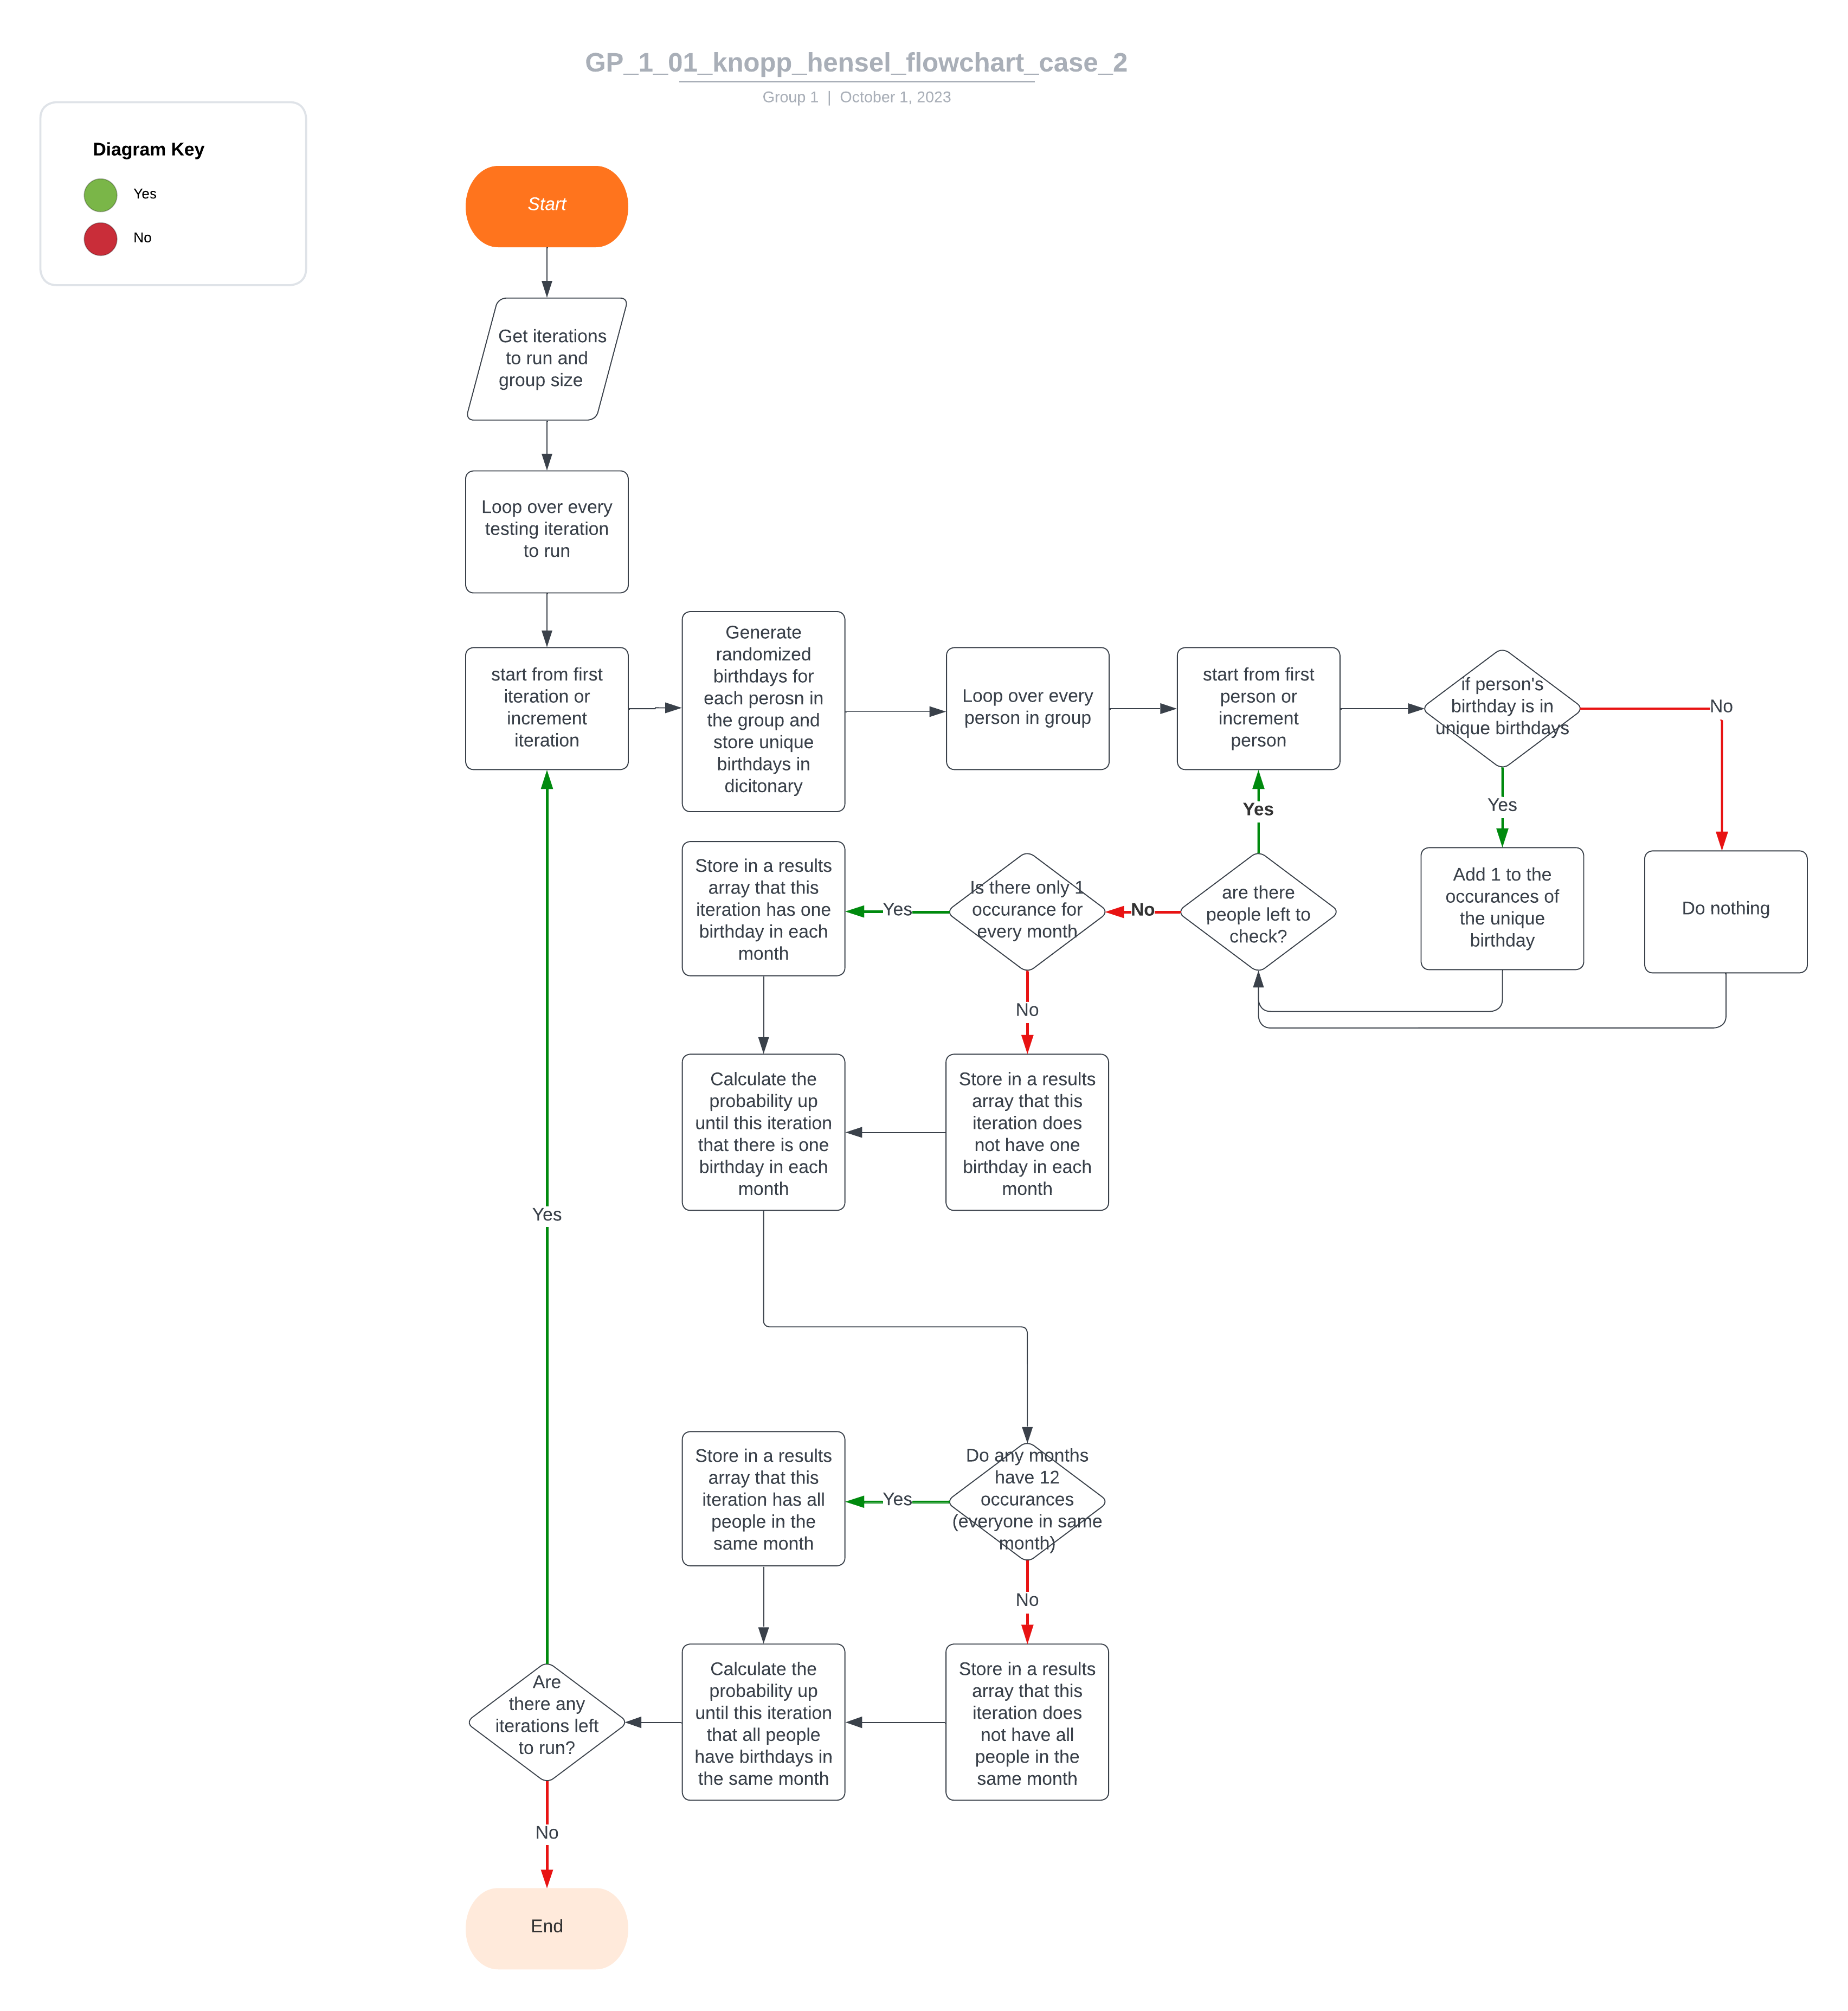

In [39]:
# Display flowchart for algorithm
Image(filename='GP_1_01_knopp_hensel_flowchart_case_2.png') 

Probability of 2 or more people sharing a birthday: 5.770005481507126e-05


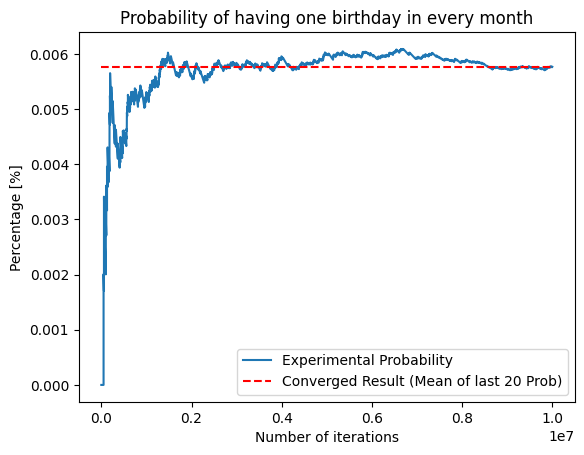

In [36]:
ave_last_20 = np.mean(prob_one_birth_each_m[-20:])
print(f'Probability of 2 or more people sharing a birthday: {ave_last_20}')

# Plot probability of having one birthday in every month
plt.plot(range(len(prob_one_birth_each_m)), [p * 100 for p in prob_one_birth_each_m], label='Experimental Probability')
plt.plot([0, len(prob_one_birth_each_m)], [ave_last_20 * 100, ave_last_20 * 100], 'r--', label='Converged Result (Mean of last 20 Prob)')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Percentage [%]')
plt.title('Probability of having one birthday in every month')
plt.show()


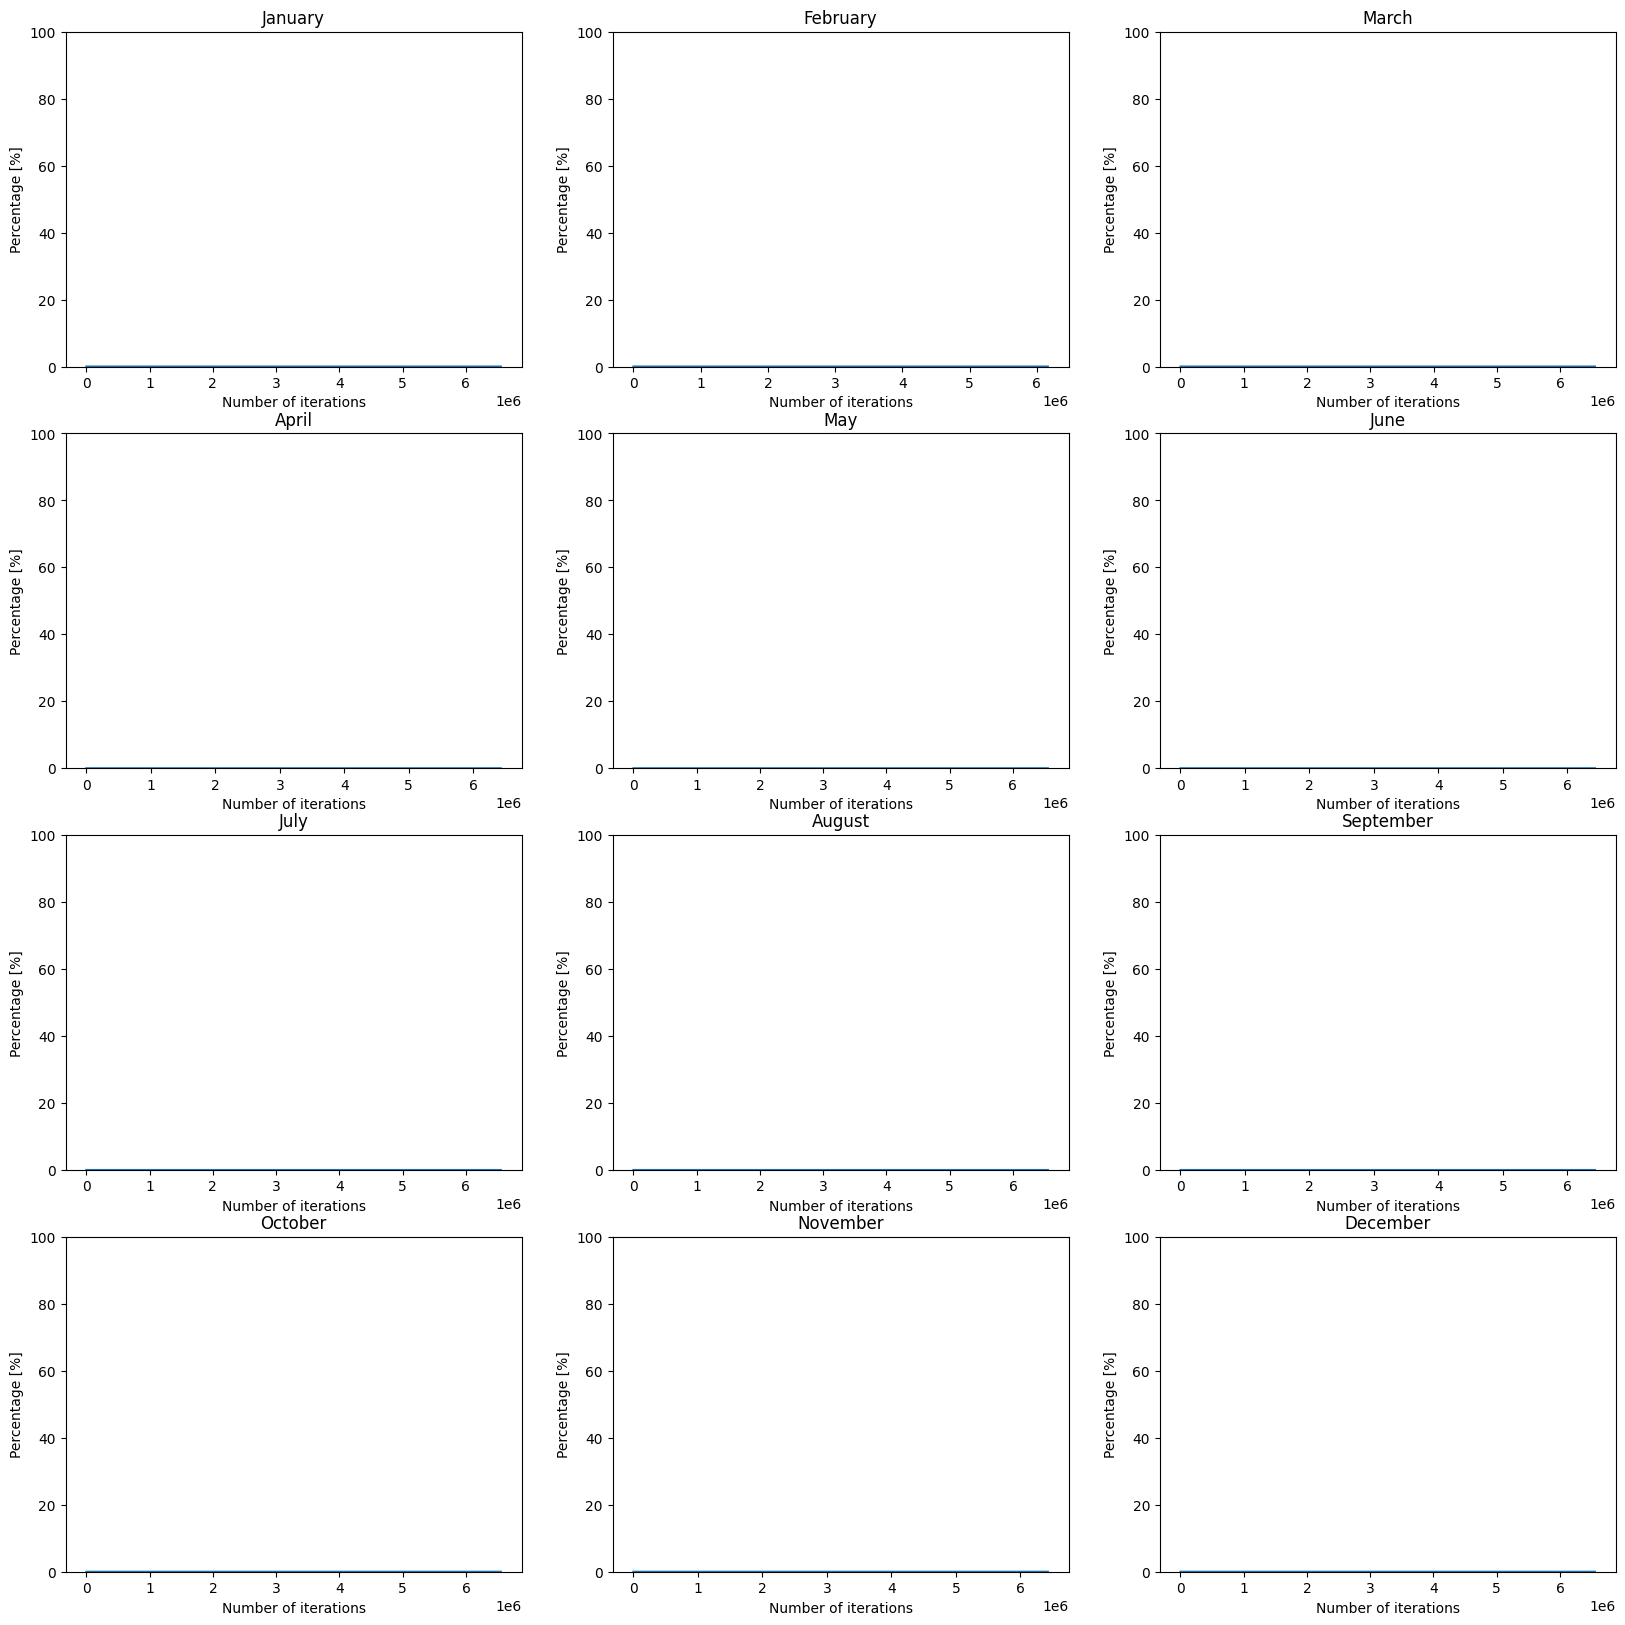

In [37]:
# Create a subplot for each month
fig, axs = plt.subplots(4, 3, figsize=(20, 20))

# Loop over each month
for month in range(1, 13):

    # Plot probability of having all birthdays in a given month
    axs[(month-1)//3, (month-1)%3].plot(range(len(prob_all_birth_in_m[month])), [p * 100 for p in prob_all_birth_in_m[month]], label='Experimental Probability')
    axs[(month-1)//3, (month-1)%3].set_xlabel('Number of iterations')
    axs[(month-1)//3, (month-1)%3].set_ylabel('Percentage [%]')
    axs[(month-1)//3, (month-1)%3].set_title(f'{month_names[month-1]}')
    axs[(month-1)//3, (month-1)%3].set_ylim(0, 100)

plt.show()

# Summary of Case 2:

For this algorithm, we use very similar code as in case 1 except we used different evaluation criteria to answer the particular quesion asked. We modified the code to only care about unique birthday months instead of months and days (since day information is not needed for this case). 

For i), once we computed all the occurances for each month, we just needed to check that all months only had 1 occurance. Since there are 12 people, this would mean that each person was born in a unique month of the year. If the number of people changed, we would have to modify our code to account for the potential of multiple people sharing the smae month even though all months would have at least 1 person. 

In our testing, the probability of one person in every month of the year was around 0.0058% for i).

We ran 1,000,000 iterations in the above analysis, but it seems like more iterations are required to get a probability with higher precision. This is apparent on the graph above as the blue line does not seem to have fully converged and remained relatively unchanging at a single probability.

For ii), once we computed all the occurances for eaach month, we just needed to check that one month had 12 occurances. Since there are 12 people, this would mean that each person was born in the same month of the year. If the number of people changed, we would have to modify our code to account for the potential of more than 12 people sharing the same month. 

In our testing, there was never a single occurance in 1,000,000 iterations where all people had the same birthday month. We computed the probability of this occuring mathematically so undstand the likelyhood of our experiments producing even a single result that matched this criteria. Taking January as an example, the probability of a single individual being born in this month is 31/365=0.0849. This mean that each individual has roughly 8.5% change of being born in January. To compute the probability of everyone being born in January, you need to take this probability to the power of the number of people. This results in a probability of: 0.0849^12 = 1.408*10^-13. This mean that we would need to run at least 1.4*10^13 iterations to have a good chance of getting only one occurance. To properly evaluate the probability, we would need orders of magnitude more iterations than this to see how the probability converges after a large number of occurances have occured. Based on the runtime of our code, this is not reasonable to compute with our current time complexity.

For this algorithm, the complexity is the same O(N^2) as Case 1 since we still have the same nested for loops when processing the birthdays. The evaluation criteria just add to the N^2 complexity value but since they are on the order of N or less, that complexity is not considred the worst case for very large N.

# Part C: Psudo Code for Average, Youngest, Oldest Age

    initialize variable for youngest age as some large value (i.e. 999)
    initialize variable for oldest   age as some small value (i.e. 0)
    initialize age_sum as 0

    get everyones birthday and store it

    loop over all birthdays

        add person's age to age_sum

        Check if person is younger than youngest age
        
            if so, overwrite youngest age

        check if person is older than oldest age

            if so, overwrite oldest age

    after looping, divide age_sum by number of people to get average

    return/print oldest, youngest, and average ages

# Discussion of Complexity

The complexity of this algorithm is O(N) because we only need to access each element of the birthday array a single time. All the other time durations of the if conditions and addition are considered negligable for complexity as N goes to infinity (worst case scneario). 

# Assumptions

We assumeed in the initialization part that no person would be younger than 0 years old or older than 999 years old. This is reasonable because no person to our knowledge has achieved this... yet...

# Part D: Modify for Large Groups

To modify the algorithms in parts A) and B), all that is needed is to change the value of 'group_size' to 1,000,000 instead of 12. The rest of the code is written such that it will account for this change automatically. This would be the same for part C) as we would have wrote the acutal code similarly such that the group size is parametric. For all parts, the complexity does not change as N changes. We still have to access array elements in the same way indepentent of the size of N. What increasing N does do, however, is increase the total time the algorithm will take to compute (this time scales with the complexity). We did not include any additional code or psudo code because the code would look identical to the above code with only the variable value change as mentioned here.